# Band edge position

In [36]:
import numpy as np
from mpl_toolkits.axes_grid.axislines import SubplotZero
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import operator

from mtfa import Material, Structure

In [2]:
# electron affinity in eV
Ea = {
    'GaAs': 4.07,
    'InAs': 4.9,
    'Si': 4.05,
    'InN': 5.8,
    'GaN': 4.1,
    'InSb': 4.59
    }

# energy gap at 300K in eV
Eg = {
    'GaAs': 1.424,
    'InAs': 0.354,
    'Si': 1.12,
    'InN': 1.97,
    'GaN': 3.28,
    'InSb': 0.17
    }

materials = ('GaAs', 'InAs', 'Si', 'InN', 'InSb', 'GaN')

In [3]:
# Sort materials by band gap
new_mat = ()
for key, value in sorted(Eg.items(), key=operator.itemgetter(1)):
    if key in materials:
        new_mat += (key,)
materials = new_mat

In [4]:
y = []
error = []

for m in materials:
    y.append(-Ea[m]-Eg[m]/2)
    error.append(Eg[m]/2)

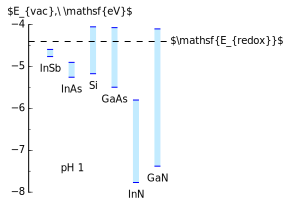

In [142]:
fill = (0.76,0.92,1)


params= {'figure.figsize': [2.5, 3],
        'svg.fonttype':'none'
        }
plt.rcParams.update(params)

E_redox = -4.4
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(len(y))+0.5
(_, caps, bars )= ax.errorbar(x, y, yerr=error, fmt='None', 
                           elinewidth=6, capsize=3)
for bar in bars:
    bar.set_color(fill)

for cap in caps:
    cap.set_color('b')
    cap.set_markeredgewidth(1)


ax.set_xlim(-0.5, max(x)+0.5)
ax.plot([-0.5, max(x)+1],[E_redox, E_redox], 'k--')

for direction in ["right", "bottom", "top"]:
        ax.spines[direction].set_visible(False)
        

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('none')

for i, m in enumerate(materials):
    set_y =- Ea[m] - Eg[m] - 0.3
    ax.text(x[i], set_y, m, ha="center", va="center") 

ax.text(max(x)+0.6, E_redox, '\$\mathsf{E_{redox}}$', va="center") 
ax.text(ax.get_xlim()[0]-1, ax.get_ylim()[1]+0.3, 
        '\$E_{vac},\ \mathsf{eV}$',
        ha="left", va="center")

ax.text(1, -7.5, 'pH 1')

ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.xticks(x, ())
plt.savefig('IP_band_edge1.svg', transparent=True)
plt.show()

In [37]:
InAs = Material('InAs')
GaAs = Material('GaAs')
st1 = Structure(InAs, Nd=1e16, length=300e-9)
st2 = Structure(GaAs, Nd=1e16, length=300e-9)

C:\Users\Dmitry\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:293: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [39]:
st2.Ef

-0.09646978299684977

In [40]:
st1.V0 = -0.1
st1.initGuess()
st1.solve()

0:  |F(x)| = 0.000120336; step 1; tol 0.000690983
1:  |F(x)| = 8.78862e-06; step 1; tol 0.00480057
2:  |F(x)| = 8.20992e-07; step 1; tol 0.00785378
3:  |F(x)| = 2.38285e-10; step 1; tol 7.58153e-08
4:  |F(x)| = 4.97806e-16; step 1; tol 3.92799e-12


In [41]:
st2.V0 = 0.2
st2.initGuess()
st2.solve()

0:  |F(x)| = 6.3744e-05; step 1; tol 8.14968e-05
1:  |F(x)| = 3.17253e-06; step 1; tol 0.00222933
2:  |F(x)| = 8.6812e-08; step 1; tol 0.000673891
3:  |F(x)| = 7.78248e-09; step 1; tol 0.00723301
4:  |F(x)| = 2.75184e-14; step 1; tol 1.12526e-11
5:  |F(x)| = 5.94318e-18; step 1; tol 4.1979e-08


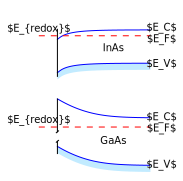

In [138]:
fill = (0.76,0.92,1)

params= {'figure.figsize': [2, 3],
        'svg.fonttype':'none'
        }
plt.rcParams.update(params)

fig = plt.figure()
phi_x1 = fig.add_subplot(211)
phi_x1.plot(st1.z*1e9, st1.sol - st1.Ef, 'b',
            st1.z*1e9, st1.sol - st1.Ef - st1.Eg, 'b',
#            st1.z*1e9, np.zeros_like(st1.z), 'r--',
            [-50, 250], [0,0], 'r--',
            [0, 0], [min(st1.sol-st1.Ef - st1.Eg)*1.1,
                     max(st1.sol- st1.Ef)*1.1], 'k')
phi_x1.fill_between(st1.z*1e9, st1.sol-st1.Eg-st1.Ef,
                    st1.sol-st1.Ef-st1.Eg-.07,
                    edgecolor=(0,0,0,0), facecolor=fill)

phi_x1.set_xlim(-50, 250)
phi_x1.set_ylim(-.5, 0.3)
phi_x1.get_yaxis().set_visible(False)
phi_x1.get_xaxis().set_visible(False)
phi_x1.set_frame_on(False)

phi_x2 = fig.add_subplot(212)
phi_x2.plot(st2.z*1e9, st2.sol - st2.Ef, 'b',
            st2.z*1e9, st2.sol - st2.Ef - 0.5, 'b',
#            st2.z*1e9, np.zeros_like(st2.z), 'r--',
            [-50, 250], [0,0], 'r--',
            [0, 0], [min(st2.sol-st2.Ef - st1.Eg)*1.1,
                     -0.15], 'k',
            [0, 0], [-0.05,
                     max(st2.sol- st2.Ef)*1.1], 'k',
           [-3,3],[-0.16,-0.14], 'k',
           [-3,3],[-0.06, -0.04], 'k',)

phi_x2.fill_between(st2.z*1e9, st2.sol-0.5-st2.Ef,
                    st2.sol-st2.Ef-0.5-.07,
                    edgecolor=(0,0,0,0), facecolor=fill)

phi_x2.set_xlim(-50, 250)
phi_x2.set_ylim(phi_x1.get_ylim())
phi_x2.get_yaxis().set_visible(False)
phi_x2.get_xaxis().set_visible(False)
phi_x2.set_frame_on(False)

phi_x2.text(150, -0.15, 'GaAs', va='center', ha='center')
phi_x2.text(150, 0.825, 'InAs', va='center', ha='center')

phi_x2.text(280, -0.02, '\$E_F$', va='center', ha='center')
phi_x2.text(280, 0.1, '\$E_C$', va='center', ha='center')
phi_x2.text(280, -0.4, '\$E_V$', va='center', ha='center')
phi_x2.text(-50, 0.07, '\$E_{redox}$', va='center', ha='center')

phi_x2.text(280, -0.02+0.94, '\$E_F$', va='center', ha='center')
phi_x2.text(280, 0.1+0.94, '\$E_C$', va='center', ha='center')
phi_x2.text(280, -0.4+1.06, '\$E_V$', va='center', ha='center')
phi_x2.text(-50, 0.07+0.96, '\$E_{redox}$', va='center', ha='center')


plt.savefig('IP_band_edge2.svg', transparent=True)